# Chlorosis HSV Segmentation

In [2]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Load Image

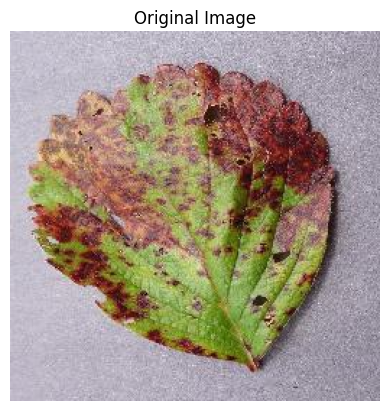

In [3]:
wd = Path('/content/drive/MyDrive/EE152')

# image file path
img_pth = wd / 'images' / 'leaf-scorch_strawberry01.JPG'

# load BGR image
img_bgr = cv2.imread(img_pth)

# Check if the image was loaded successfully
if img_bgr is None:
    print(f"Error: Image not loaded. Check path: {img_pth}")
else:
    # convert BGR to RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Display
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off') # Optional: removes the x/y axis numbers
    plt.show()

## Chloratic Area

### 2. Define Chloratic (Yellow/Brown) Ranges

In [4]:
# convert BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Range 1: Reddish Browns
                    # H,  S,  V
lowr_brwn = np.array([0, 50, 20])
uppr_brwn = np.array([25, 255, 200])

### 3. Extract Masks

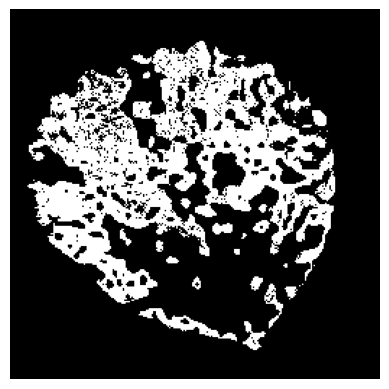

In [31]:
msk_red = cv2.inRange(img_hsv, lowr_brwn, uppr_brwn)

plt.imshow(msk_red, cmap='gray')
plt.axis('off') # remove x/y axes
plt.show()

#### 4. Mask Morphology Transformation

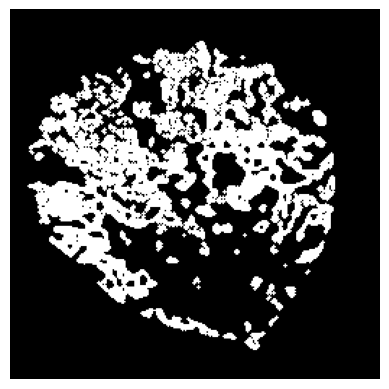

In [51]:
# create morphology kernels
krnl_sqr = np.ones((3,3), np.uint8)
krnl_rnd = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

msk_red_cln = cv2.morphologyEx(msk_red, cv2.MORPH_OPEN, krnl_rnd)

plt.imshow(msk_red_cln, cmap='gray')
plt.axis('off') # Optional: removes the x/y axis numbers
plt.show()

### 5. Apply Mask to Original Image

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

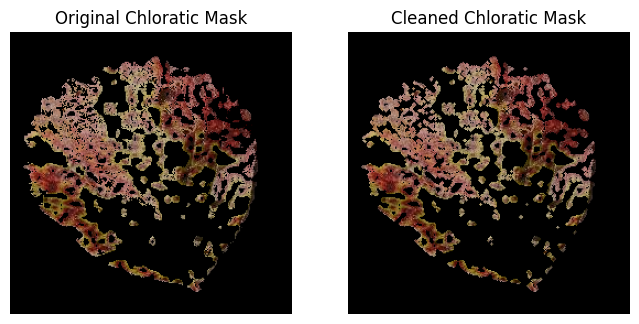

In [55]:
# bitwise AND RGB image with chloratic mask
img_chl_msk1 = cv2.bitwise_and(img_rgb, img_rgb, mask=msk_red)
img_chl_msk2 = cv2.bitwise_and(img_rgb, img_rgb, mask=msk_red_cln)

# Display
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(img_chl_msk1)
plt.title('Original Chloratic Mask')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_chl_msk2)
plt.title('Cleaned Chloratic Mask')
plt.axis('off')

### Display Results

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

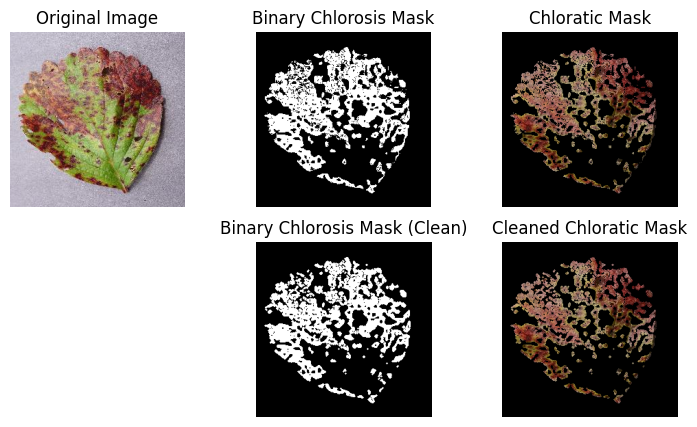

In [70]:
plt.figure(figsize=(9,5))

# Plot 1
plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot 2
plt.subplot(2,3,2)
plt.imshow(msk_red, cmap='gray')
plt.title('Binary Chlorosis Mask')
plt.axis('off')

# Plot 3
plt.subplot(2,3,3)
plt.imshow(img_chl_msk1)
plt.title('Chloratic Mask')
plt.axis('off')

# Plot 4
plt.subplot(2,3,5)
plt.imshow(msk_red_cln, cmap='gray')
plt.title('Binary Chlorosis Mask (Clean)')
plt.axis('off')

# Plot 5
plt.subplot(2,3,6)
plt.imshow(img_chl_msk2)
plt.title('Cleaned Chloratic Mask')
plt.axis('off')

## Healthy Area

### 2. Define Healthy (Green) Ranges

In [20]:
                   # H,  S,  V
low_grn = np.array([35, 40, 40])
hi_grn = np.array([85, 255, 255])

### 3. Extract Green Mask

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

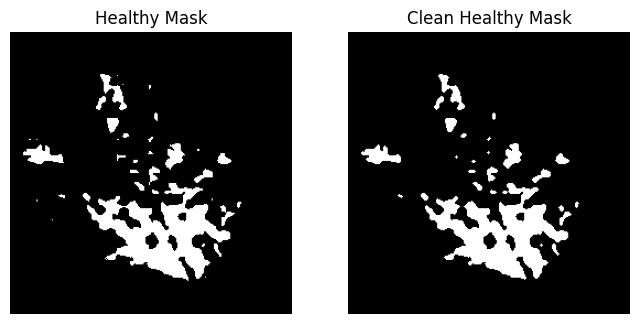

In [53]:
# green mask
msk_grn = cv2.inRange(img_hsv, low_grn, hi_grn)

# 4. clean the green mask (for comparison)
msk_grn_cln = cv2.morphologyEx(msk_grn, cv2.MORPH_OPEN, krnl_rnd)

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(msk_grn, cmap='gray')
plt.title('Healthy Mask')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(msk_grn_cln, cmap='gray')
plt.title('Clean Healthy Mask')
plt.axis('off')

### 5. Apply Mask to Original Image

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

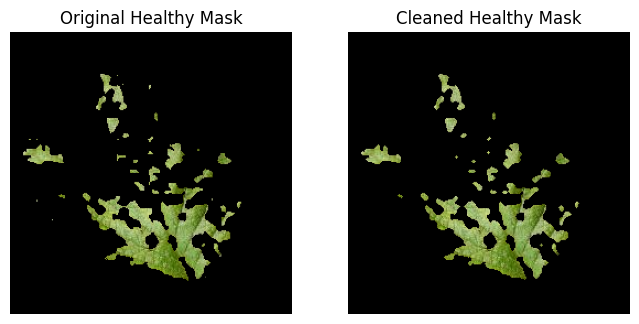

In [59]:
# bitwise AND RGB image with healthy mask
img_hlt_msk1 = cv2.bitwise_and(img_rgb, img_rgb, mask=msk_grn)
img_hlt_msk2 = cv2.bitwise_and(img_rgb, img_rgb, mask=msk_grn_cln)

# Display
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(img_hlt_msk1)
plt.title('Original Healthy Mask')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_hlt_msk2)
plt.title('Cleaned Healthy Mask')
plt.axis('off')

### Display Results

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

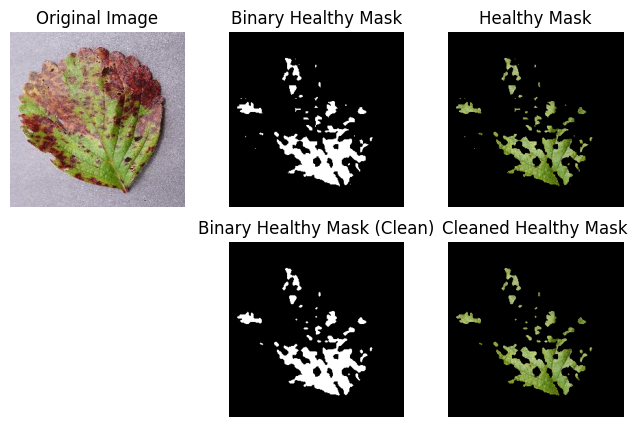

In [60]:
plt.figure(figsize=(8,5))

# Plot 1
plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot 2
plt.subplot(2,3,2)
plt.imshow(msk_grn, cmap='gray')
plt.title('Binary Healthy Mask')
plt.axis('off')

# Plot 3
plt.subplot(2,3,3)
plt.imshow(img_hlt_msk1)
plt.title('Healthy Mask')
plt.axis('off')

# Plot 4
plt.subplot(2,3,5)
plt.imshow(msk_grn_cln, cmap='gray')
plt.title('Binary Healthy Mask (Clean)')
plt.axis('off')

# Plot 5
plt.subplot(2,3,6)
plt.imshow(img_hlt_msk2)
plt.title('Cleaned Healthy Mask')
plt.axis('off')

## 6. Chlorosis Analysis

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

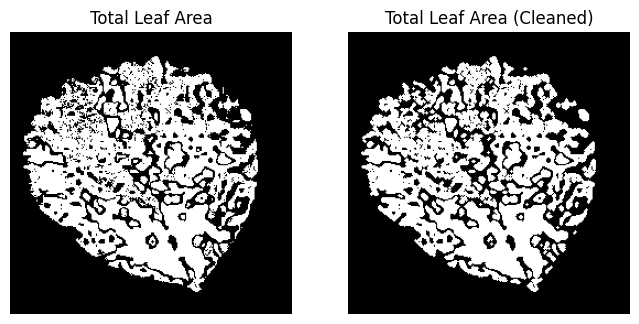

In [42]:
# combine healthy (green) and sick (red/brown/yellow) masks
msk_tot1 = cv2.bitwise_or(msk_grn, msk_red)
msk_tot2 = cv2.bitwise_or(msk_grn_cln, msk_red_cln)

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.imshow(msk_tot1, cmap='gray')
plt.title('Total Leaf Area')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(msk_tot2, cmap='gray')
plt.title('Total Leaf Area (Cleaned)')
plt.axis('off')

### 7. Highlight Healthy & Sick Layers

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

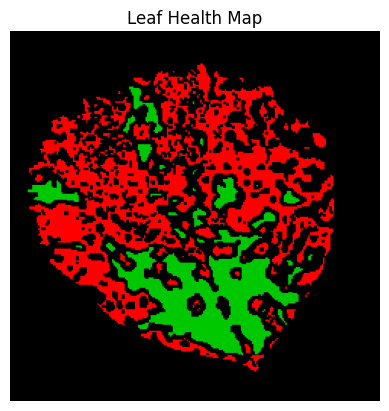

In [43]:
# create blank colored image
h2w_ratio = img_rgb.shape[0] / img_rgb.shape[1]
new_height = int(500 * h2w_ratio)

# resize
img_rgb_resize = cv2.resize(img_rgb, (500, new_height))
msk_red_resize = cv2.resize(msk_red, (500, new_height))
msk_grn_resize = cv2.resize(msk_grn, (500, new_height))

# define layers to add
y_layer = np.zeros_like(img_rgb_resize, dtype=np.uint8)  # yellow layer
g_layer = np.zeros_like(img_rgb_resize, dtype=np.uint8)  # green layer

# map binary masks to colors
y_layer[msk_red_resize == 255] = [255, 0, 0]  # yellow
g_layer[msk_grn_resize == 255] = [0, 200, 0]  # green

# Combine layers into one image
h_map = cv2.add(y_layer, g_layer)

# Display
plt.imshow(h_map)
plt.title('Leaf Health Map')
plt.axis('off')

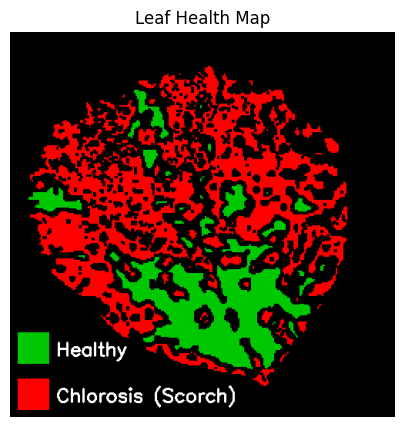

In [62]:
# make a copy of health map image
h_map_mrkd = h_map.copy()

# text configuration
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
thickness = 2
text_color = (255, 255, 255)  # white text

# draw 'healthy' legend
#                       pt1=(x, y),  pt2=(x+width, y+height)
cv2.rectangle(h_map_mrkd, (10, 390), (50, 430), (0, 200, 0), -1)  # green square
# add text
cv2.putText(h_map_mrkd, 'Healthy', (60, 420), font, font_scale, text_color, thickness)

# draw 'chlorosis' legend
cv2.rectangle(h_map_mrkd, (10, 450), (50, 490), (255, 0, 0), -1)  # red square
# 2. Add Text next to it
cv2.putText(h_map_mrkd, 'Chlorosis (Scorch)', (60, 480), font, font_scale, text_color, thickness)

# display
plt.figure(figsize=(5, 5))
plt.imshow(h_map_mrkd)
plt.axis('off')
plt.title("Leaf Health Map")
plt.show()

### Display Results

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

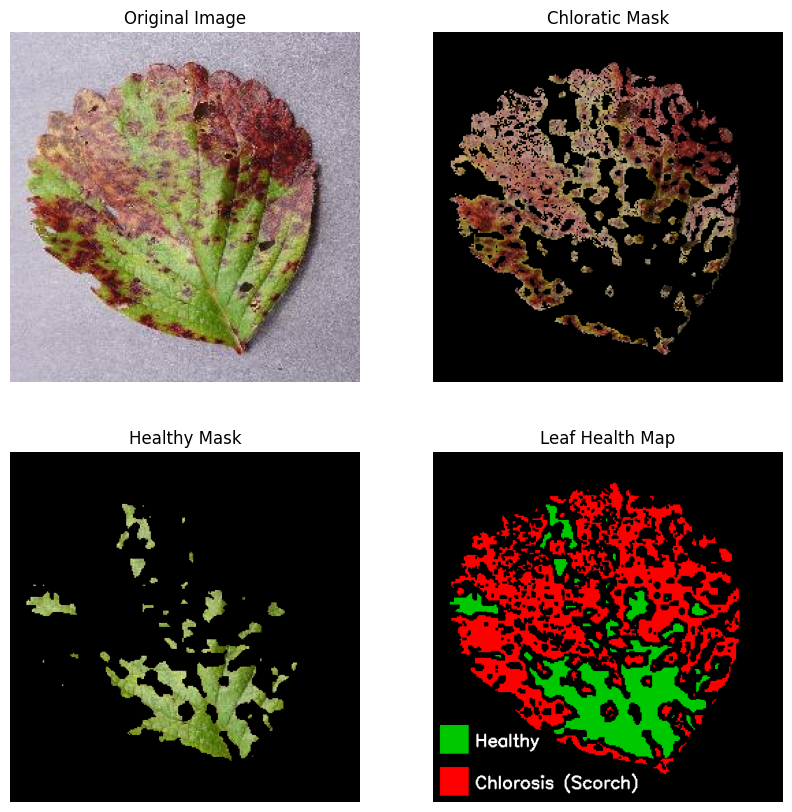

In [66]:
plt.figure(figsize=(10,10))

# Plot 1
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Plot 2
plt.subplot(2,2,2)
plt.imshow(img_chl_msk1)
plt.title('Chloratic Mask')
plt.axis('off')

# Plot 3
plt.subplot(2,2,3)
plt.imshow(img_hlt_msk1)
plt.title('Healthy Mask')
plt.axis('off')

# Plot 4
plt.subplot(2,2,4)
plt.imshow(h_map_mrkd)
plt.title('Leaf Health Map')
plt.axis('off')

### 8. Count Pixels

In [44]:
pxls_sck1 = cv2.countNonZero(msk_red)
pxls_sck2 = cv2.countNonZero(msk_red_cln)  # clean masks
pxls_tot1 = cv2.countNonZero(msk_tot1)
pxls_tot2 = cv2.countNonZero(msk_tot2)  # clean masks

### 9. Calculate Percentage

In [45]:
# ----- Results from original masks -----

print('*** CHLOROSIS RESULTS ***')
if pxls_tot1 > 0:
    chl_prc1 = (pxls_sck1 / pxls_tot1) * 100
    print(f'Total Leaf Pixels: {pxls_tot1}')
    print(f'Scorch Pixels: {pxls_sck1}')
    print(f'Chlorosis Percentage: {chl_prc1:.2f}%')
else:
    print('error')

# Uses the entire leaf area but has more chlorosis (realistic).

*** CHLOROSIS RESULTS ***
Total Leaf Pixels: 22591
Scorch Pixels: 16225
Chlorosis Percentage: 71.82%


In [46]:
# ----- Results from cleaned masks -----

print('*** CHLOROSIS RESULTS (CLEANED) ***')
if pxls_tot2 > 0:
    chl_prc2 = (pxls_sck2 / pxls_tot2) * 100
    print(f'Total Leaf Pixels: {pxls_tot2}')
    print(f'Scorch Pixels: {pxls_sck2}')
    print(f'Chlorosis Percentage: {chl_prc2:.2f}%')
else:
    print('error')

# Has less chlorosis but does not use the entire leaf area (theoretical?).

*** CHLOROSIS RESULTS (CLEANED) ***
Total Leaf Pixels: 21455
Scorch Pixels: 15240
Chlorosis Percentage: 71.03%
